<a href="https://colab.research.google.com/github/shaniRevach/Toddler-autism-diagnosis-model/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Intro:**
We, Shani Ben Yitzhak and Ayala Rubinstein, a pair of computer science students, interested in the subject of autism and how it can be identified in toddlers according to daily behavior.
We decided to explore the subject in depth as part of the project in the data science course.

### **The problem**

Autistic Spectrum Disorder (ASD) is a neurodevelopmental  condition associated with significant healthcare costs, and early diagnosis can significantly reduce these. Unfortunately, waiting times for an ASD diagnosis are lengthy and procedures are not cost effective. 
The economic impact of autism and the increase in the number of ASD cases across the world reveals an urgent need for the development of easily implemented and effective screening methods. Therefore, a time-efficient and accessible ASD screening is imminent to help health professionals and inform individuals whether they should pursue formal clinical diagnosis.

The rapid growth in the number of ASD cases worldwide necessitates datasets related to behaviour traits. However, such datasets are rare making it difficult to perform thorough analyses to improve the efficiency, sensitivity, specificity and predictive accuracy of the ASD screening process. 

Presently, very limited autism datasets associated with clinical or screening are available and most of them are genetic in nature.  we found a dataset related to autism screening of toddlers that contained influential features to be utilised for further analysis especially in determining autistic traits and improving the classification of ASD cases. 
In this dataset, exists ten behavioural features (Q-Chat-10) plus other individuals characteristics that have proved to be effective in detecting the ASD cases from controls in behaviour science. 

We would like to find a model with maximum accuracy for predicting ASD in toddlers according to their behavioural features.




### **Attributes**:

A1-A10: Items within Q-Chat-10  in which questions possible answers : “Always, Usually, Sometimes, Rarly & Never” items’ values are mapped to “1” or “0” in the dataset. For questions 1-9 (A1-A9) in Q-chat-10,  if the respose was  Sometimes / Rarly / Never “1” is assigned to the question (A1-A9). However, for question 10 (A10), if the respose was Always / Usually / Sometimes then “1” is assigned to that question. If the user obtained More than 3 Add points together for all ten questions. If your child scores more than 3 (Q-chat-10- score) then there is a potential ASD traits otherwise no ASD traits are observed.

The remaining features in the datasets are collected from the “submit” screen in the ASDTests screening app. It should be noted that the class varaible was assigned automatically based on the score obtained by the user while undergoing the screening process using the ASDTests app.










Details of variables mapping to the Q-Chat-10 screening methods:


|Variable in Dataset | Corresponding Q-chat-10-Toddler Features |
 --- | --- |
| A1 |  Does your child look at you when you call his/her name? |
| A2 | How easy is it for you to get eye contact with your child?  |
| A3 | Does your child point to indicate that s/he wants something? (e.g. a toy that is out of reach) |
| A4 | Does your child point to share interest with you? (e.g. pointing at an interesting sight) |
| A5 | Does your child pretend? (e.g. care for dolls, talk on a toy phone)  |
| A6 | Does your child follow where you’re looking?  |
| A7 | If you or someone else in the family is visibly upset, does your child show signs of wanting to comfort them? (e.g. stroking hair, hugging them)|
| A8 | Would you describe your child’s first words as:  |
| A9 | Does your child use simple gestures? (e.g. wave goodbye)  |   
| A10 | Does your child stare at nothing with no apparent purpose?  |


Features collected and their descriptions:

|feature | type | description |
 --- | --- | --- |
| A1: Question 1 Answer  |    |  The answer code of the question based on the screening method used   |
| A2: Question 2 Answer  | Number |  The answer code of the question based on the screening method used   |
| A3: Question 3 Answer  | Number |  The answer code of the question based on the screening method used   |
| A4: Question 4 Answer  | Number |  The answer code of the question based on the screening method used   |
| A5: Question 5 Answer  | Number |  The answer code of the question based on the screening method used   |
| A6: Question 6 Answer  | Number |  The answer code of the question based on the screening method used   |
| A7: Question 7 Answer  | Number |  The answer code of the question based on the screening method used   |
| A8: Question 8 Answer  | Number |  The answer code of the question based on the screening method used   |
| A9: Question 9 Answer  | Number |  The answer code of the question based on the screening method used   |
| A10: Question 10 Answer  | Number |  The answer code of the question based on the screening method used   |
| Q-chat-10- score | Number | 1-10 (Less that or equal 3 no ASD traits; > 3 ASD traits  |
| Age_Mons | Number |  Toddler age in months |
| Sex | character | male/female  |
| Ethnicity | String | List of common ethnicities in text format |
| Jaundice | Boolean | Whether the case was born with jaundice |
| Family_mem_with_ASD | Boolean | Whether any immediate family member has a PDD   |
| Who completed the test | String | Parent, self, caregiver, medical staff, clinician ,etc.  |
| Class/ASD Traits | String | ASD traits or No ASD traits (automatically assigned by the ASDTests app). (Yes / No) |



### Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


# Dimensionality reduction
from sklearn.decomposition import PCA


# Classification
from sklearn.mixture import GaussianMixture 
from sklearn.cluster import KMeans 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

from xgboost import XGBClassifier

from keras.models import Sequential
from keras.layers import *
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import plot_model


# Regression
from sklearn.linear_model import LogisticRegression


# preprocessing
from sklearn.preprocessing import StandardScaler
from scipy.stats import mode



# Modelling Helpers :
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix


# shap
!pip install shap &> /dev/null
import shap
shap.initjs()

We will import the data from the drive:

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## **Eda**

let's load our data and examine it:

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Toddler Autism dataset July 2018.csv')
df.head()  

Case_No  A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Qchat-10-Score  \
0        1   0   0   0   0   0   0   1   1   0    1        28               3   
1        2   1   1   0   0   0   1   1   0   0    0        36               4   
2        3   1   0   0   0   0   0   1   1   0    1        36               4   
3        4   1   1   1   1   1   1   1   1   1    1        24              10   
4        5   1   1   0   1   1   1   1   1   1    1        20               9   

  Sex       Ethnicity Jaundice Family_mem_with_ASD Who completed the test  \
0   f  middle eastern      yes                  no          family member   
1   m  White European      yes                  no          family member   
2   m  middle eastern      yes                  no          family member   
3   m        Hispanic       no                  no          family member   
4   f  White European       no                 yes          family member   

  Class/ASD Traits   
0                No  
1               Yes  
2               Yes  
3               Yes  
4               Yes

In [ ]:
df = df.drop(['Case_No'], axis = 1)

In [ ]:
df.dtypes

A1                         int64
A2                         int64
A3                         int64
A4                         int64
A5                         int64
A6                         int64
A7                         int64
A8                         int64
A9                         int64
A10                        int64
Age_Mons                   int64
Qchat-10-Score             int64
Sex                       object
Ethnicity                 object
Jaundice                  object
Family_mem_with_ASD       object
Who completed the test    object
Class/ASD Traits          object
dtype: object

In [ ]:
df.describe()

A1           A2           A3           A4           A5  \
count  1054.000000  1054.000000  1054.000000  1054.000000  1054.000000   
mean      0.563567     0.448767     0.401328     0.512334     0.524668   
std       0.496178     0.497604     0.490400     0.500085     0.499628   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       1.000000     0.000000     0.000000     1.000000     1.000000   
75%       1.000000     1.000000     1.000000     1.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                A6           A7           A8           A9          A10  \
count  1054.000000  1054.000000  1054.000000  1054.000000  1054.000000   
mean      0.576850     0.649905     0.459203     0.489564     0.586338   
std       0.494293     0.477226     0.498569     0.500128     0.492723   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       1.000000     1.000000     0.000000     0.000000     1.000000   
75%       1.000000     1.000000     1.000000     1.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          Age_Mons  Qchat-10-Score  
count  1054.000000     1054.000000  
mean     27.867173        5.212524  
std       7.980354        2.907304  
min      12.000000        0.000000  
25%      23.000000        3.000000  
50%      30.000000        5.000000  
75%      36.000000        8.000000  
max      36.000000       10.000000

###Create new dataFrame with numeric values:

####features that have two possible values:

In [ ]:
df_numeric = pd.get_dummies(df, columns=[ 'Sex', 'Jaundice', 'Family_mem_with_ASD', 'Class/ASD Traits '], drop_first=True)
df_numeric.head()

A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Qchat-10-Score  \
0   0   0   0   0   0   0   1   1   0    1        28               3   
1   1   1   0   0   0   1   1   0   0    0        36               4   
2   1   0   0   0   0   0   1   1   0    1        36               4   
3   1   1   1   1   1   1   1   1   1    1        24              10   
4   1   1   0   1   1   1   1   1   1    1        20               9   

        Ethnicity Who completed the test  Sex_m  Jaundice_yes  \
0  middle eastern          family member      0             1   
1  White European          family member      1             1   
2  middle eastern          family member      1             1   
3        Hispanic          family member      1             0   
4  White European          family member      0             0   

   Family_mem_with_ASD_yes  Class/ASD Traits _Yes  
0                        0                      0  
1                        0                      1  
2                        0                      1  
3                        0                      1  
4                        1                      1

####features that have more possible values:

In [ ]:
cat_features = df_numeric.select_dtypes(include='object')
num_features = df_numeric.select_dtypes(exclude='object')
df_numeric = pd.get_dummies(df_numeric, drop_first=True)
df_numeric.head()

A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  ...  Ethnicity_White European  \
0   0   0   0   0   0   0   1   1   0    1  ...                         0   
1   1   1   0   0   0   1   1   0   0    0  ...                         1   
2   1   0   0   0   0   0   1   1   0    1  ...                         0   
3   1   1   1   1   1   1   1   1   1    1  ...                         0   
4   1   1   0   1   1   1   1   1   1    1  ...                         1   

   Ethnicity_asian  Ethnicity_black  Ethnicity_middle eastern  \
0                0                0                         1   
1                0                0                         0   
2                0                0                         1   
3                0                0                         0   
4                0                0                         0   

   Ethnicity_mixed  Ethnicity_south asian  \
0                0                      0   
1                0                      0   
2                0                      0   
3                0                      0   
4                0                      0   

   Who completed the test_Health care professional  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Who completed the test_Others  Who completed the test_Self  \
0                              0                            0   
1                              0                            0   
2                              0                            0   
3                              0                            0   
4                              0                            0   

   Who completed the test_family member  
0                                     1  
1                                     1  
2                                     1  
3                                     1  
4                                     1  

[5 rows x 30 columns]

In [ ]:
df_numeric.shape

(1054, 30)

now we have 30 features.

We would like to separate the cataloging column from the properties space, as well as delete the irrelevant columns:









In [ ]:
classes = df_numeric['Class/ASD Traits _Yes']
features = df_numeric.drop(['Class/ASD Traits _Yes', 'Qchat-10-Score'], axis = 1 )

###Normalization:

In [ ]:
features_norm = StandardScaler().fit_transform(features)

### Dimensionality reduction 

In [ ]:
pca = PCA()
components = pca.fit_transform(features)

Let's see how the components affect the cumulative explained variance

Text(0, 0.5, 'Cumulative Explained Variance')

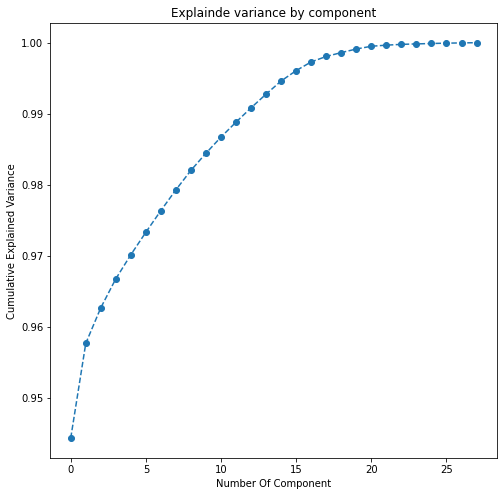

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(range(0,28),pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explainde variance by component')
plt.xlabel('Number Of Component')
plt.ylabel('Cumulative Explained Variance')

We see that after one component the accuracy is 0.958 and more components add a lot of information to us.

In [ ]:
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(5),
    color=df['Class/ASD Traits ']
)
fig.update_traces(diagonal_visible=False,)

It is nice to see visually that for pc1 with pc2 we get the clearest division of the data.

We can see it also in three-dimensional graph of the first 3 components:

In [ ]:
pca = PCA(n_components=3)
components = pca.fit_transform(features)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['Class/ASD Traits '],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()


We have reached a sufficient variance of 96.27%, for 3 components, and the clear division can be seen in this dynamic graph.


Check for each of the PCs to what extent it "explains" the information variance:

In [ ]:
pca.explained_variance_ 

array([63.71158554,  0.89889163,  0.33832484])

Now we will see how the first components affect the cumulative explained variance

Text(0, 0.5, 'Cumulative Explained Variance')

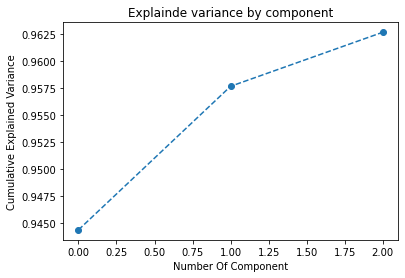

In [ ]:
plt.figure()
plt.plot(range(0,3),pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explainde variance by component')
plt.xlabel('Number Of Component')
plt.ylabel('Cumulative Explained Variance')

In [ ]:
pca = PCA(2) 
components = pca.fit_transform(features)

###Clustering

In [ ]:
X = df_numeric.drop(['Class/ASD Traits _Yes'], axis = 1)
Y = df_numeric['Class/ASD Traits _Yes']

In [ ]:
components

array([[-0.12049278,  1.03077403],
       [-8.13762791,  0.17417383],
       [-8.12886118,  0.63766566],
       ...,
       [ 9.87760492, -1.11763654],
       [ 8.85856471,  0.77640764],
       [ 3.84403403, -0.42442151]])

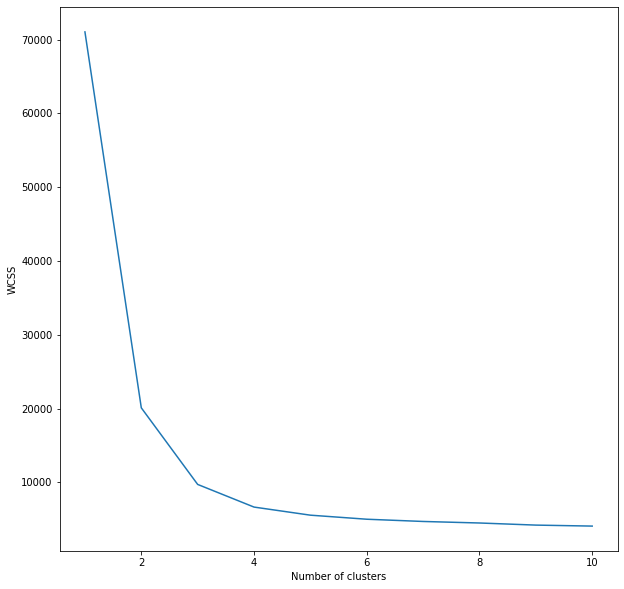

In [ ]:
wcss = []
for i in range(1,11):
   model = KMeans(n_clusters = i, init = "k-means++")
   model.fit(features)
   wcss.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
model = KMeans(n_clusters = 4, init = "k-means++")
label = model.fit_predict(components)
print(label)

[3 0 0 ... 2 1 1]


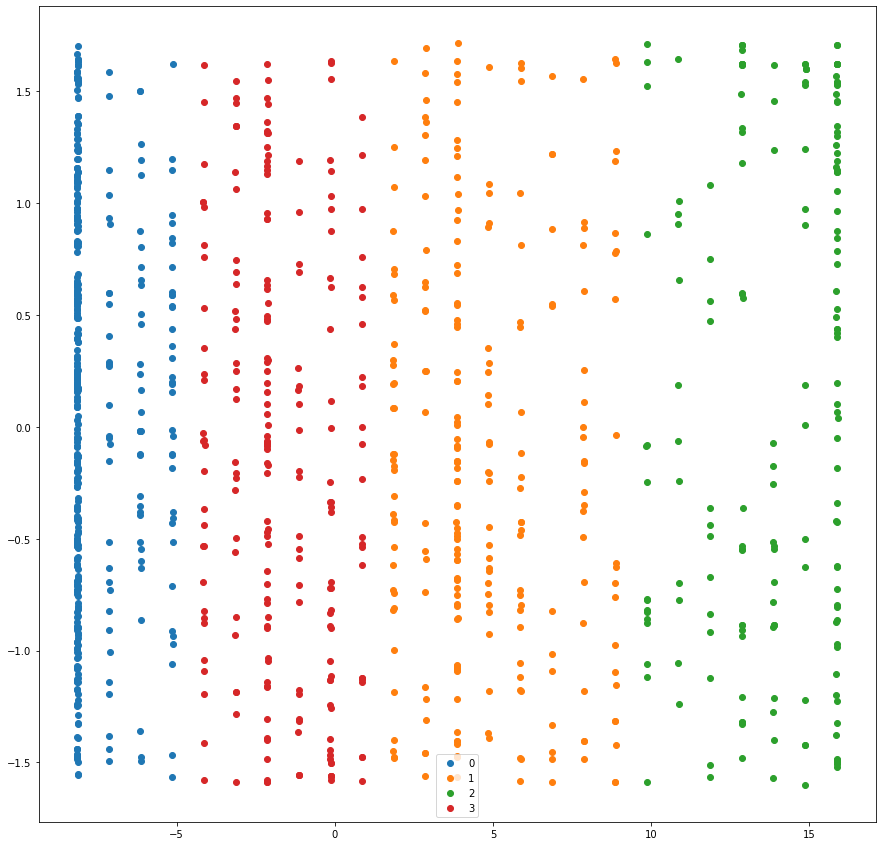

In [ ]:
plt.figure(figsize=(15,15))
uniq = np.unique(label)
for i in uniq:
  plt.scatter(components[label == i , 0] , components[label == i , 1] , label = i)
  
plt.legend()
plt.show()

In [ ]:
model = KMeans(n_clusters = 6, init = "k-means++")
label = model.fit_predict(components)
print(label)


[4 0 0 ... 5 5 1]


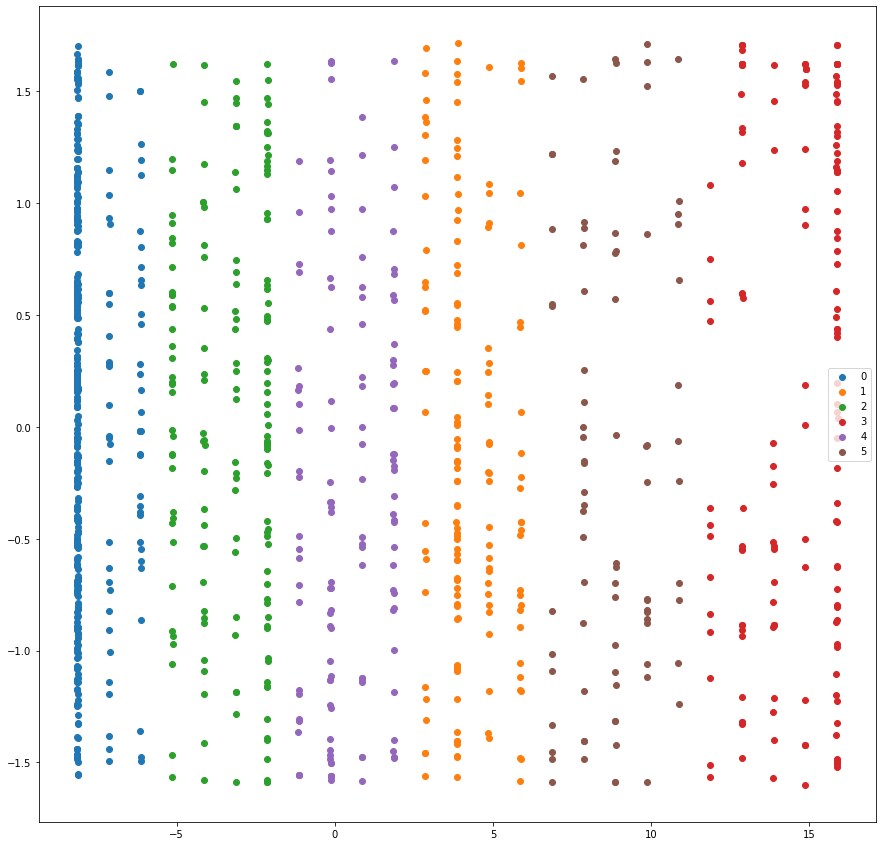

In [ ]:
plt.figure(figsize=(15,15))
uniq = np.unique(label)
for i in uniq:
  plt.scatter(components[label == i , 0] , components[label == i , 1] , label = i)
  
plt.legend()
plt.show()

Now, the kmeans object contains the cataloging model. (We can send information 
to the model and get the forecast from it
(prediction). 

In [ ]:
model.cluster_centers_

array([[-7.87896898,  0.07966602],
       [ 4.23821174, -0.11846985],
       [-3.34787105,  0.0585852 ],
       [14.51278803,  0.20859522],
       [ 0.4341576 , -0.31983196],
       [ 8.78427433, -0.15837695]])

In [ ]:
#The data whith the predict:
label

array([4, 0, 0, ..., 5, 5, 1], dtype=int32)

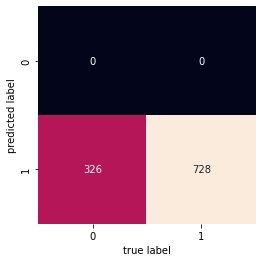

In [ ]:
labels = np.zeros_like(label)
for i in range(10):
 mask = (label == i)
 labels[mask] = mode(Y[mask])[0]

mat = confusion_matrix(Y, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Data analysis by visualizations








#### We will examine the ratio in the results of the diagnoses: 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



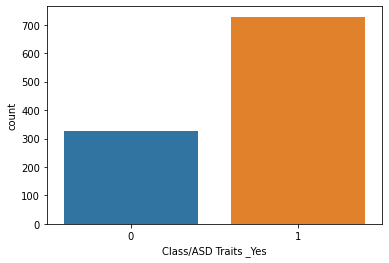

In [ ]:
sns.countplot(classes, label="count")

In [ ]:
yes_autism= df[df['Class/ASD Traits ']=='Yes']
no_autism= df[df['Class/ASD Traits ']=='No']

we have 728 toldders diagnosed with ASD and 326 not.







This result can be explained by the fact that the toddlers tested were suspected of ASD, meaning that the sample does not represent the entire population. 

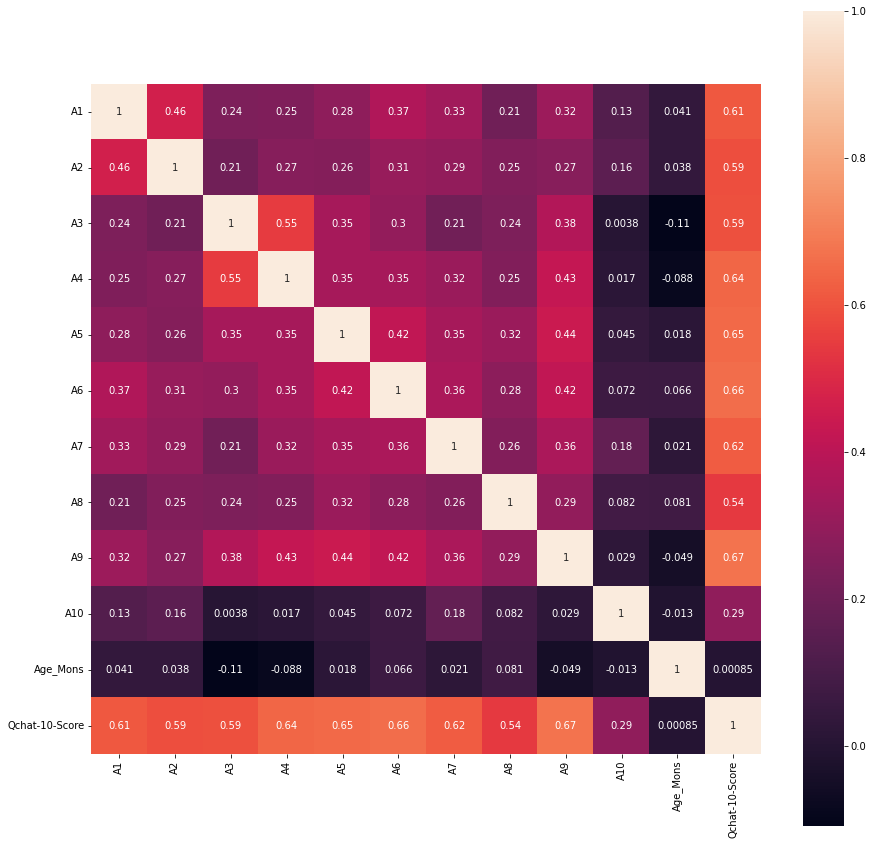

In [ ]:
corr = df.corr( )
plt.figure(figsize = (15,15))
sns.heatmap(data = corr, annot = True, square = True, cbar = True)

Interpreting the Heatmap of Correlation

The features in orange colour shows high correlation, we can see all the 10 answers from A1 to A9 except A10 are highly correlated with Qchart10-score. 
Therefore, it is better to remove the Qchat coloumn from our feature list because it is going to mislead our results.

####Let's take a look at the data layout relation to gender:






([<matplotlib.patches.Wedge at 0x7fd0fe916610>,
 [Text(-0.976673118620744, -0.6972156189900154, 'male'),
  Text(0.8952836322308103, 0.6391144012300203, 'female')],
 [Text(-0.5697259858621007, -0.4067091110775089, '69.7%'),
  Text(0.48833652667135097, 0.34860785521637466, '30.3%')])

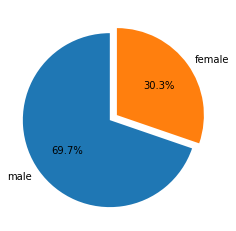

In [ ]:
plt.pie(df["Sex"].value_counts(),labels=('male','female'),explode = [0.1,0],autopct ='%1.1f%%' ,
       startangle = 90,labeldistance = 1.1)

In [ ]:
fig = px.bar(df, x="Sex", y='Qchat-10-Score')
fig.show()

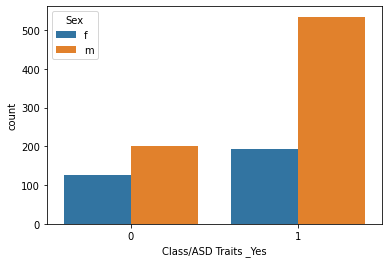

In [ ]:
ax = sns.countplot(x=classes, hue="Sex", data=df)

In [ ]:
yes_autism['Sex'].value_counts()

m    534
f    194
Name: Sex, dtype: int64

In [ ]:
no_autism['Sex'].value_counts()

m    201
f    125
Name: Sex, dtype: int64

The ratio of girls tested to boys is 0.43, plus
the ratio of fossilized girls with autism to boys with autism is 0.36.

It is interesting to see that the prevalence of autism in boys is much greater than the prevalence of autism in girls.  Girls seem to be more resistant to the development of the signs of autism - a greater genetic disorder is needed to cause autism in girls than in boys. This may be because the social side of girls is more developed.



#### Let’s look at the ratio of children diagnosed with jaundice to those who have not.

([<matplotlib.patches.Wedge at 0x7fd0fe822650>,
 [Text(-0.9081759396795839, -0.7843573564307948, 'no Jaundice'),
  Text(0.8324946786900477, 0.7189941654511214, 'Jaundice')],
 [Text(-0.5297692981464238, -0.45754179125129696, '72.7%'),
  Text(0.45408800655820775, 0.3921786357006116, '27.3%')])

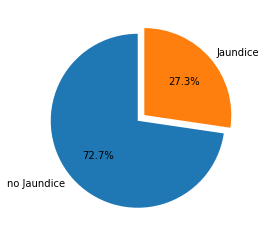

In [ ]:
plt.pie(df["Jaundice"].value_counts(),labels=('no Jaundice','Jaundice'),explode = [0.1,0],autopct ='%1.1f%%' ,
       startangle = 90,labeldistance = 1.1)

Is there a link between jaundice and gender?

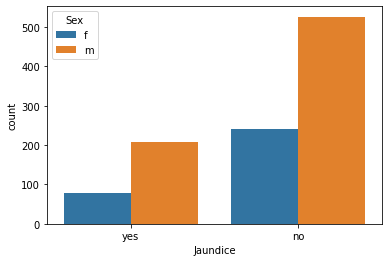

In [ ]:
ax = sns.countplot(x='Jaundice', hue="Sex", data=df)

Oops, there doesn't seem to be a connection between them.

but could it be that jaundice is an influencing factor for autism?

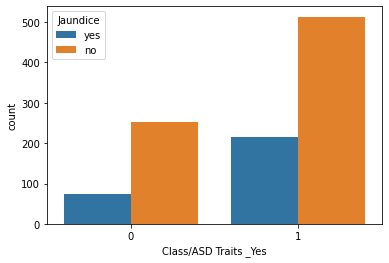

In [ ]:
ax = sns.countplot(x=classes, hue="Jaundice", data=df)

In [ ]:
yes_autism['Jaundice'].value_counts()

no     513
yes    215
Name: Jaundice, dtype: int64

In [ ]:
no_autism['Jaundice'].value_counts()

no     253
yes     73
Name: Jaundice, dtype: int64

Wow! The ratio of the number of toddlres diagnosed with jaundice with autism (215) to those diagnosed without jaundice but with autism (513) is 0.43 and that greater than the ratio of those diagnosed with jaundice without autism (73) to those diagnosed without jaundice and without autism (253) that is 0.32.

This suggests that there is a significant association between jaundice in the newborn and autism in toddlers.

#### Intetresting to understand if autism is hereditary disease.





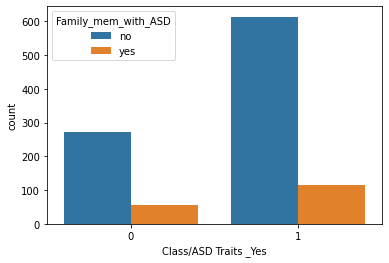

In [ ]:
ax = sns.countplot(x=classes, hue="Family_mem_with_ASD", data=df)

In [ ]:
yes_autism['Family_mem_with_ASD'].value_counts()

no     613
yes    115
Name: Family_mem_with_ASD, dtype: int64

In [ ]:
no_autism['Family_mem_with_ASD'].value_counts()

no     271
yes     55
Name: Family_mem_with_ASD, dtype: int64

The findings show that autism has a strong genetic basis, meaning that for toddlers with a family member with autism the chance of autism is higher.

#### let's see how the age inflence.

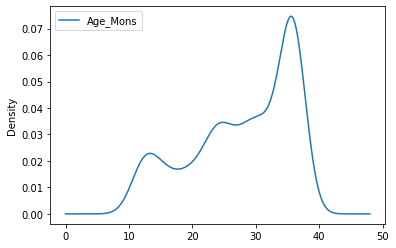

In [ ]:
df[['Age_Mons']].plot(kind='kde');

we can see that the most toddlers that participate were between 30 to 40 monthes.

now lets chek the age range in which toddlers were diagnosed with autism:‏

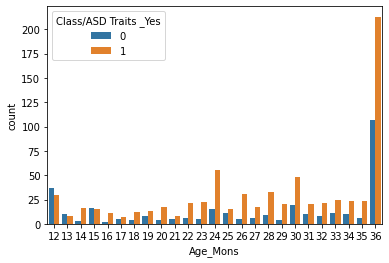

In [ ]:
ax = sns.countplot(x=df['Age_Mons'], hue=classes, data=df)

We will see the ethnicity of toddlers along with age and autism diagnosis results

In [ ]:
fig = px.bar(df, x='Ethnicity', y='Age_Mons',
             hover_data=['Class/ASD Traits '], color='Class/ASD Traits ',
             labels={'Qchat-10-Score':'population of Canada'}, height=400)
fig.show()

We will examine the distribution of different values according to violinplot visualization:

examine the distribution of the ten behavioral features of toddlers:

In [ ]:
data = pd.concat([classes, features.iloc[:,0:9]], axis=1)

In [ ]:
data = pd.melt(data, id_vars="Class/ASD Traits _Yes", var_name="features", value_name='value')

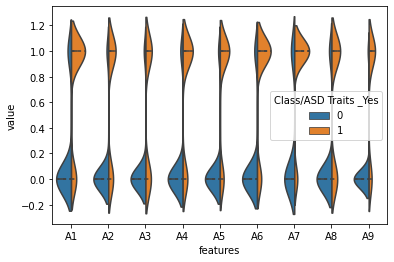

In [ ]:
sns.violinplot(x="features", y="value", hue="Class/ASD Traits _Yes", data=data, split=True , inner="quart")

It can be seen that not all questions can be used as a suitable feature for the catalog, because in order to examine ASD needs an overall view of all the behavioral questions.

We will therefore examine this visualization for Qchat-10-Score.

In [ ]:
data = pd.concat([classes, df_numeric.iloc[:,11:12]], axis=1)

In [ ]:
data = pd.melt(data, id_vars="Class/ASD Traits _Yes", var_name="df_numeric", value_name='value')

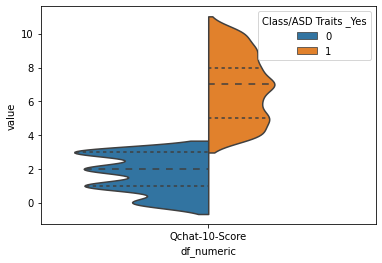

In [ ]:
sns.violinplot(x="df_numeric", y="value", hue="Class/ASD Traits _Yes", data=data, split=True , inner="quart")

In this violin visualization it can be seen that the classification is very accurate, meaning that all toddlers who received a score of 4 or higher are indeed diagnosed with autism.

##conclusion

We found interesting findings on autism in toddlers according to the given data.
Most toddlers are suspected of being 30-40 months old, probably this is the time when children start communicating normally.
Gender genetics and jaundice at birth are also significant causes of the onset of autism in toddlers.

Remove the Qchat-10-Score feature as it has been used to assign the class label so if you keep the score variable the models derived might be overfitted.

In [ ]:
df.drop('Qchat-10-Score', axis = 1, inplace = True)
df_numeric=df_numeric.drop(['Qchat-10-Score'], axis = 1)

In [ ]:
X = df_numeric.drop(['Class/ASD Traits _Yes'], axis = 1)
Y = df_numeric['Class/ASD Traits _Yes']

##**Classification**

After seeing interesting findings on the data of toddlers suspected of autism,
We will move on to look for a model that can by our data predict the maximum accuracy level of autism in toddlers.
We will take a number of algorithms from which models are built by our data, and find the most accurate model so that when we run it with data on any toddler who is suspected of autism - we can most accurately predict whether he has ASD.

### Division into training data and test data:

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.40, random_state = 42)

### Define functions for the models



In [ ]:
#accuracy_score and confusion_matrix
def analysis_of_results(model,name ,X_test,Y_test,Y_hat_test, Y_hat_train):
    plot_confusion_matrix(model, X_test ,Y_test)
    print('\n')
    print(f'test accuracy: {round(accuracy_score(Y_test, Y_hat_test),2)}')
    print(f'train accuracy: {round(accuracy_score(Y_train, Y_hat_train),2)}')
    print('\n')
    print(f'\tConfusion Matrix')
    plt.show()
    print('\n');
    print('Confusion Matrix:\n', pd.crosstab(Y_test, Y_hat_test, rownames=['Actual'], colnames=['Predicted'],margins = True))
    print('\ntest report:\n' + classification_report(Y_test, Y_hat_test))
    print('~'*60)
    print('\ntrain report:\n' + classification_report(Y_train, Y_hat_train))
    print('-'*60)

###**models**:

#### Logistic regression

Regression is a method of finding a formula (mathematical relationship) that, given a vector of independent variables x, calculates a value for a dependent variable y.

Logistic regression divides the results to 2.



test accuracy: 1.0
train accuracy: 1.0


	Confusion Matrix


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



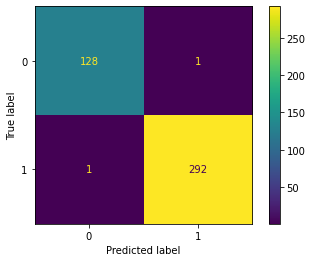



Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          128    1  129
1            1  292  293
All        129  293  422

test report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       129
           1       1.00      1.00      1.00       293

    accuracy                           1.00       422
   macro avg       0.99      0.99      0.99       422
weighted avg       1.00      1.00      1.00       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       197
           1       1.00      1.00      1.00       435

    accuracy                           1.00       632
   macro avg       1.00      1.00      1.00       632
weighted avg       1.00      1.00      1.00       632

------------------------------------------------------------


In [ ]:
model = LogisticRegression() 
model.fit(X_train,Y_train)
Y_hat_test = model.predict(X_test).astype(int)
Y_hat_train = model.predict(X_train).astype(int)
analysis_of_results(model,'Logistic Regression' ,X_test,Y_test,Y_hat_test, Y_hat_train)

####K-nearest neighbours

The algorithm builds a model that examines the Euclidean distance between the new data and data whose catalog is known. And categorizes it as the most common class among the K nearest neighbors.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.





test accuracy: 0.94
train accuracy: 0.95


	Confusion Matrix


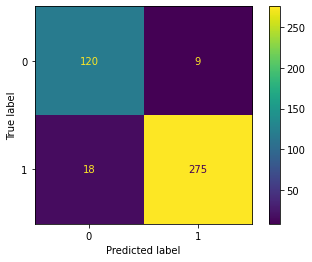



Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          120    9  129
1           18  275  293
All        138  284  422

test report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       129
           1       0.97      0.94      0.95       293

    accuracy                           0.94       422
   macro avg       0.92      0.93      0.93       422
weighted avg       0.94      0.94      0.94       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       197
           1       0.98      0.95      0.96       435

    accuracy                           0.95       632
   macro avg       0.94      0.95      0.95       632
weighted avg       0.95      0.95      0.95       632

------------------------------------------------------------


In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
Y_hat_test = model.predict(X_test).astype(int)
Y_hat_train = model.predict(X_train).astype(int)
analysis_of_results(model,'K-nearest neighbours' ,X_test,Y_test,Y_hat_test, Y_hat_train)

In [ ]:
shap.initjs()

explainer = shap.KernelExplainer(model.predict_proba, X_train)
shap_values = explainer.shap_values(X_test.iloc[0,:])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[0,:])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

Using 632 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning:

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipelin

Each of the features contributes to push the model output from the base value (the average model output over the training dataset we passed) towards zero. The features displayed in red are more pushing.

We predicted 0.00, whereas the base_value is 0.3304. Feature values causing increased predictions are in pink, and their visual size shows the magnitude of the feature's effect. Feature values decreasing the prediction are in blue. The biggest impact comes from A4 being 0. Though the A9 = 1 value has a meaningful effect decreasing the prediction.

####GaussianNB

A probabilistic data classification method based on the assumption that there is no dependence between the classified objects when their classification is already known.
The advantage of this classification method is the ability to expand easily to support a large amount of data.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.





test accuracy: 0.57
train accuracy: 0.56


	Confusion Matrix


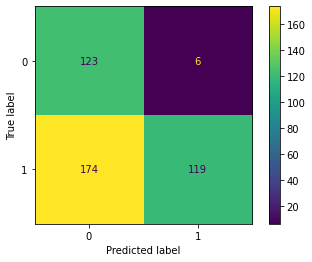



Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          123    6  129
1          174  119  293
All        297  125  422

test report:
              precision    recall  f1-score   support

           0       0.41      0.95      0.58       129
           1       0.95      0.41      0.57       293

    accuracy                           0.57       422
   macro avg       0.68      0.68      0.57       422
weighted avg       0.79      0.57      0.57       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.42      0.99      0.59       197
           1       0.99      0.37      0.54       435

    accuracy                           0.56       632
   macro avg       0.70      0.68      0.56       632
weighted avg       0.81      0.56      0.55       632

------------------------------------------------------------


In [ ]:
model = GaussianNB()
model.fit(X_train, Y_train)
Y_hat_test = model.predict(X_test).astype(int)
Y_hat_train = model.predict(X_train).astype(int)
analysis_of_results(model,'XGB' ,X_test,Y_test,Y_hat_test, Y_hat_train)

####XGB

XGBoost is a decision tree-based machine learning model that demonstrates superiority over deep machine learning in most cases and as long as the database is not too large and complicated.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.





test accuracy: 0.99
train accuracy: 1.0


	Confusion Matrix


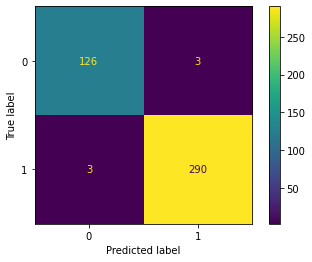



Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          126    3  129
1            3  290  293
All        129  293  422

test report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       129
           1       0.99      0.99      0.99       293

    accuracy                           0.99       422
   macro avg       0.98      0.98      0.98       422
weighted avg       0.99      0.99      0.99       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       197
           1       1.00      1.00      1.00       435

    accuracy                           1.00       632
   macro avg       1.00      1.00      1.00       632
weighted avg       1.00      1.00      1.00       632

------------------------------------------------------------


In [ ]:
model = XGBClassifier()
model.fit(X_train, Y_train)
Y_hat_test = model.predict(X_test).astype(int)
Y_hat_train = model.predict(X_train).astype(int)
analysis_of_results(model,'XGB' ,X_test,Y_test,Y_hat_test, Y_hat_train)

In [ ]:
shap.initjs()

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

We predicted -0.77, whereas the base_value is 1.101. The biggest impact comes from A8 = 1. Though the A6 value has a meaningful effect decreasing the prediction.

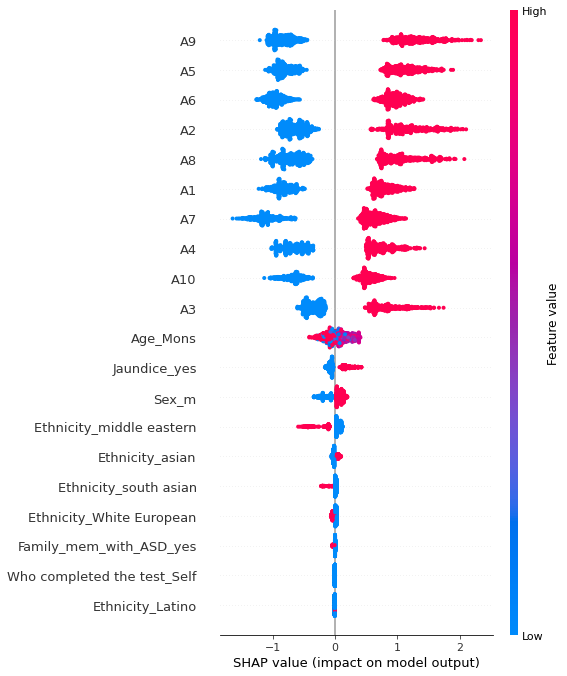

In [ ]:
shap.summary_plot(shap_values, X)

The features are ranked according to their importance in descending order, That is, A9 has a highest and most positive effect on autism prediction, and Ethnicity_middle_eastern is negatively correlated with the target variable.

In [ ]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8, 8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

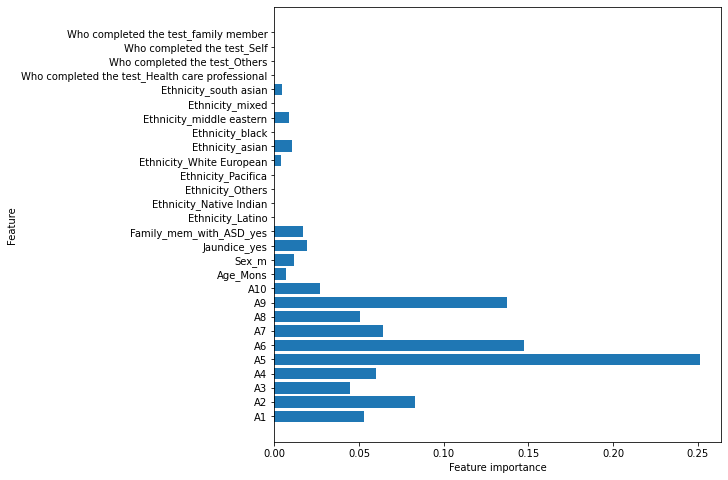

In [ ]:
plot_feature_importances(model)

####Support vector machine

A method for analyzing data for classification and regression, where the training examples are represented as vectors in linear space.
In the training phase appropriate classifier created in svm - which separates as positively as possible between positive and negative training examples. The classifier is the linear separator which creates as large a space as possible between it and the examples closest to it in the two categories.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.





test accuracy: 0.75
train accuracy: 0.74


	Confusion Matrix


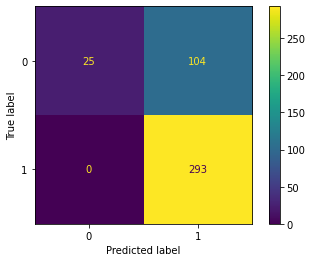



Confusion Matrix:
 Predicted   0    1  All
Actual                 
0          25  104  129
1           0  293  293
All        25  397  422

test report:
              precision    recall  f1-score   support

           0       1.00      0.19      0.32       129
           1       0.74      1.00      0.85       293

    accuracy                           0.75       422
   macro avg       0.87      0.60      0.59       422
weighted avg       0.82      0.75      0.69       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       1.00      0.17      0.29       197
           1       0.73      1.00      0.84       435

    accuracy                           0.74       632
   macro avg       0.86      0.59      0.57       632
weighted avg       0.81      0.74      0.67       632

------------------------------------------------------------


In [ ]:
model = SVC(kernel = 'rbf', probability = True)
model.fit(X_train, Y_train)
Y_hat_test = model.predict(X_test).astype(int)
Y_hat_train = model.predict(X_train).astype(int)
analysis_of_results(model,'SVC' ,X_test,Y_test,Y_hat_test, Y_hat_train)

In [ ]:
%%capture

explainer = shap.KernelExplainer(model.predict_proba, X_train, link="logit")
shap_values = explainer.shap_values(X_test, nsamples=100)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0,:], link="logit")

We predicted 0.00, whereas the base_value is 0.3625. The biggest impact comes from who completed the test_self = 0. Though the Age_mons = 33 value has a meaningful effect decreasing the prediction.

In [ ]:
shap.initjs()

shap.force_plot(explainer.expected_value[0], shap_values[0], X_test, link="logit")

####Decision Tree

A decision tree is a prediction model that provides a mapping between observations and the values that are appropriate for them. And by the model we can expect for a figure that is not cataloged its target value.
It is a solid binary tree consisting of decision nodes in each of which a particular condition is tested on a particular characteristic of the observations and leaves that contain the predicted value for the observation corresponding to the path leading to them in the tree.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.





test accuracy: 0.91
train accuracy: 1.0


	Confusion Matrix


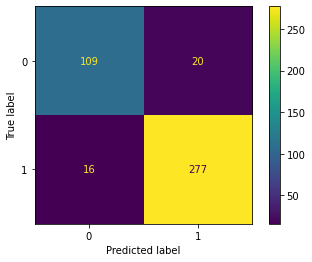



Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          109   20  129
1           16  277  293
All        125  297  422

test report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       129
           1       0.93      0.95      0.94       293

    accuracy                           0.91       422
   macro avg       0.90      0.90      0.90       422
weighted avg       0.91      0.91      0.91       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       197
           1       1.00      1.00      1.00       435

    accuracy                           1.00       632
   macro avg       1.00      1.00      1.00       632
weighted avg       1.00      1.00      1.00       632

------------------------------------------------------------


In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
Y_hat_test = model.predict(X_test).astype(int)
Y_hat_train = model.predict(X_train).astype(int)
analysis_of_results(model,'Decision Tree' ,X_test,Y_test,Y_hat_test, Y_hat_train)

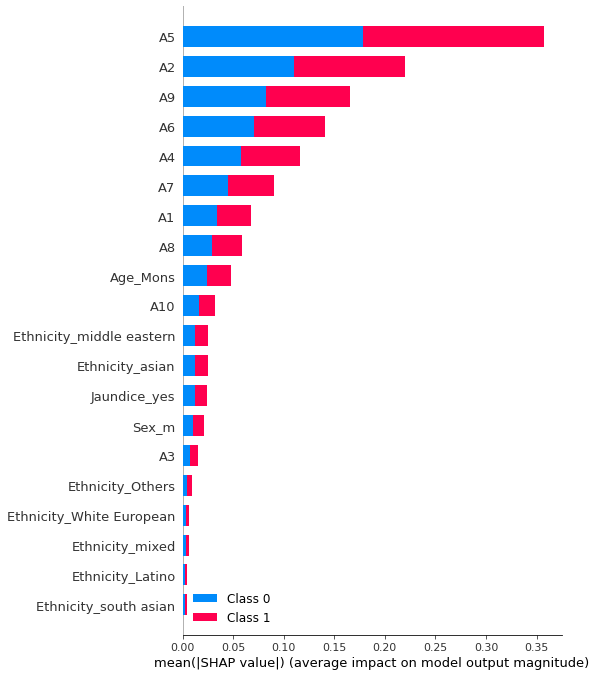

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type= "bar")

The features are ranked according to their importance in descending order, A5 is most efective, A2 after it etc.

####Random Forest

Compared to decision tree, this algorithm helps not to fall for over-fitting, in that it trains an array of decision trees and each tree is responsible for a different part of the information, and finally unifies the information to obtain one final tree.



test accuracy: 0.97
train accuracy: 1.0


	Confusion Matrix


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



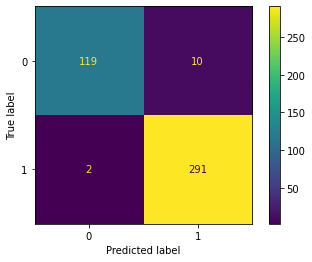



Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          119   10  129
1            2  291  293
All        121  301  422

test report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       129
           1       0.97      0.99      0.98       293

    accuracy                           0.97       422
   macro avg       0.98      0.96      0.97       422
weighted avg       0.97      0.97      0.97       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       197
           1       1.00      1.00      1.00       435

    accuracy                           1.00       632
   macro avg       1.00      1.00      1.00       632
weighted avg       1.00      1.00      1.00       632

------------------------------------------------------------


In [ ]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)
Y_hat_test = model.predict(X_test).astype(int)
Y_hat_train = model.predict(X_train).astype(int)
analysis_of_results(model,'Decision Tree' ,X_test,Y_test,Y_hat_test, Y_hat_train)

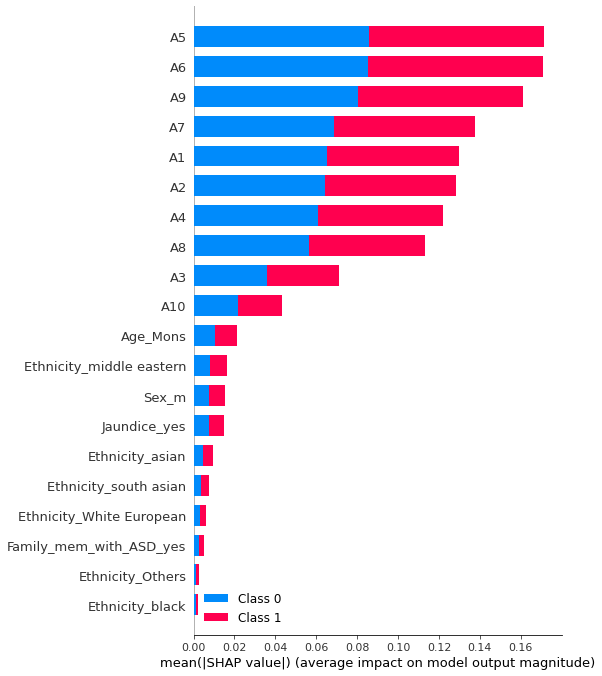

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type= "bar")

The features are ranked according to their importance in descending order, A6 is most efective, A5 after it etc.

####Linear Discriminant Analysis

It is a statistical technique that creates a function capable of classifying phenomena, taking into account a series of discriminatory variables and the probability of belonging.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.





test accuracy: 0.96
train accuracy: 0.97


	Confusion Matrix


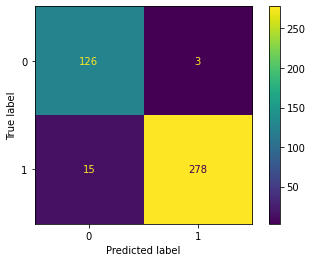



Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          126    3  129
1           15  278  293
All        141  281  422

test report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       129
           1       0.99      0.95      0.97       293

    accuracy                           0.96       422
   macro avg       0.94      0.96      0.95       422
weighted avg       0.96      0.96      0.96       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       197
           1       1.00      0.96      0.98       435

    accuracy                           0.97       632
   macro avg       0.96      0.97      0.96       632
weighted avg       0.97      0.97      0.97       632

------------------------------------------------------------


In [ ]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
Y_hat_test = model.predict(X_test).astype(int)
Y_hat_train = model.predict(X_train).astype(int)
analysis_of_results(model,'Linear Discriminant Analysis' ,X_test,Y_test,Y_hat_test, Y_hat_train)

###Accuracy Summary

In [ ]:
models = ["Logistic regression", "K-nearest neighbours", "GaussianNB", "XGB",
          "Support vector machine", "Decision Tree", "Random Forest", "Linear Discriminant Analysis"]
test_accuracy = [1, 0.94, 0.57, 0.99, 0.75, 0.92, 0.97, 0.96]
train_accuracy = [1, 0.95, 0.56, 1, 0.74, 1, 1, 0.97]
accuracy_summary = pd.DataFrame([models,  test_accuracy, train_accuracy]).T 
accuracy_summary.columns = ["Classifier", "test_accuracy", "train_accuracy"] 
accuracy_summary

Classifier test_accuracy train_accuracy
0           Logistic regression             1              1
1          K-nearest neighbours          0.94           0.95
2                    GaussianNB          0.57           0.56
3                           XGB          0.99              1
4        Support vector machine          0.75           0.74
5                 Decision Tree          0.92              1
6                 Random Forest          0.97              1
7  Linear Discriminant Analysis          0.96           0.97

**Logistic Regression** model training and testing accuracy are 100%, Recall, Precision, F1score are 100% for both yes autism and no autism patients, False positive, and True negative= 2. Logistic Regression with default parameters is the best model.

**KNN** model has test accuracy: 0.94,train accuracy: 0.95, and weight average Recall = 94%. so KNN is a good model.

**GaussianNB** has low accuracy: 0.57 so it is rejected.

**XG Boosting** has test accuracy: 0.99, train accuracy: 1.0, and Weighted average Recall for positive cases = 99%, So XG Boosting is an ideal model ranked number 2 after Logistic Regression.

The **support vector machine** has low accuracy: 0.75 so it is rejected.

The **decision tree** model has test accuracy: 0.92 and train accuracy: 1. This model has to be hyper tuned to adjust the overfitting, so it is not accepted.

**Random forest** model has test accuracy: 0.97 and train accuracy: 1.so it is  also a good model

**Linear Discriminant Analysis** has training accuracy: 0.96 and testing accuracy:0.97 and Recall accuracy= 96% So LinearDiscriminantAnalysis is also a good model.


Now, We will try to hyper tune support vector machine using grid search without pipeline, then we will hyper tune random forest using grid-search with the pipeline, additionally, we will model with a neural network through sikit learn, and Keras library.

####Tuning hyperparameters for SVC

In [ ]:
model = SVC()

params = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}

clf = GridSearchCV(model, param_grid = params, scoring = 'accuracy', cv = 10, verbose = 2)

clf.fit(X_train, Y_train) 


Fitting 10 folds for each of 128 candidates, totalling 1280 fits
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=2)

In [ ]:
clf.best_params_

{'C': 0.8, 'gamma': 0.1, 'kernel': 'linear'}

####SVC after hypertunned

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.





test accuracy: 1.0
train accuracy: 1.0


	Confusion Matrix


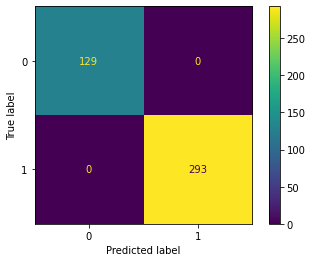



Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          129    0  129
1            0  293  293
All        129  293  422

test report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       293

    accuracy                           1.00       422
   macro avg       1.00      1.00      1.00       422
weighted avg       1.00      1.00      1.00       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       197
           1       1.00      1.00      1.00       435

    accuracy                           1.00       632
   macro avg       1.00      1.00      1.00       632
weighted avg       1.00      1.00      1.00       632

------------------------------------------------------------


In [ ]:
model = SVC(C = 0.8, gamma = 0.1, kernel = 'linear', probability = True)
model.fit(X_train, Y_train)
Y_hat_test = model.predict(X_test).astype(int)
Y_hat_train = model.predict(X_train).astype(int)
analysis_of_results(model,'SVC' ,X_test,Y_test,Y_hat_test, Y_hat_train)

In [ ]:
%%capture
explainer = shap.KernelExplainer(model.predict_proba, X_train, link="logit")
shap_values = explainer.shap_values(X_test, nsamples=100)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0,:], link="logit")

We predicted 0.00, whereas the base_value is 0.3124. the A7 = 1 value has a meaningful effect decreasing the prediction, A2 = 1 is the next, etc.

In [ ]:
shap.initjs()

shap.force_plot(explainer.expected_value[0], shap_values[0], X_test, link="logit")

####Neural Network Classifier Using SKLearn



test accuracy: 0.98
train accuracy: 1.0


	Confusion Matrix


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



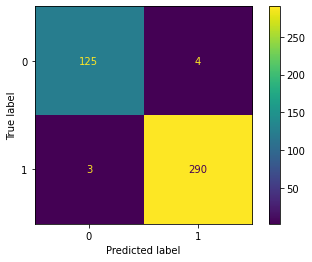



Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          125    4  129
1            3  290  293
All        128  294  422

test report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       129
           1       0.99      0.99      0.99       293

    accuracy                           0.98       422
   macro avg       0.98      0.98      0.98       422
weighted avg       0.98      0.98      0.98       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       197
           1       1.00      1.00      1.00       435

    accuracy                           1.00       632
   macro avg       1.00      1.00      1.00       632
weighted avg       1.00      1.00      1.00       632

------------------------------------------------------------


In [ ]:
model = MLPClassifier(activation='tanh', solver='lbfgs',learning_rate='constant',
                                   early_stopping= False, alpha=0.0001 ,hidden_layer_sizes=(100, 3),random_state=33)
model.fit(X_train, Y_train)

Y_hat_test = model.predict(X_test)
Y_hat_train = model.predict(X_train)

analysis_of_results(model,'MLPClassifier' ,X_test,Y_test,Y_hat_test, Y_hat_train)

####Neural Network Classifier Using Keras 


In [ ]:
model = Sequential()
model.add(Dense(100, input_dim = 28, activation='relu'))

model.add(Dense(activation = 'sigmoid', units = 1))


model.compile(loss='binary_crossentropy',
             optimizer = Adam(lr=0.0001, decay=1e-5),
              metrics=['acc'])

model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



Epoch 1/100
20/20 [==============================] - 1s 13ms/step - loss: 0.6577 - acc: 0.6883 - val_loss: 0.6078 - val_acc: 0.6943
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6004 - acc: 0.6883 - val_loss: 0.5695 - val_acc: 0.6943
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5703 - acc: 0.6883 - val_loss: 0.5531 - val_acc: 0.6967
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5552 - acc: 0.6883 - val_loss: 0.5391 - val_acc: 0.6967
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5415 - acc: 0.6883 - val_loss: 0.5259 - val_acc: 0.6967
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5287 - acc: 0.6915 - val_loss: 0.5130 - val_acc: 0.6991
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5162 - acc: 0.6994 - val_loss: 0.5007 - val_acc: 0.7062
Epoch 8/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5044 - 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               2900      
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 3,001
Trainable params: 3,001
Non-trainable params: 0
_________________________________________________________________


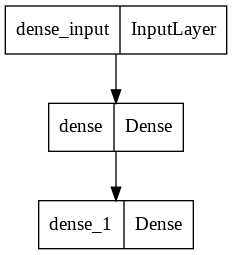

In [ ]:
plot_model(model)

In [ ]:
Y_hat_test = model.predict(X_test).astype(int)
Y_hat_train = model.predict(X_train).astype(int)

print(classification_report(Y_test, Y_hat_test))
print("kerasNN_test_acc:",round(accuracy_score(Y_test, Y_hat_test), 2))
print("kerasNN_train_acc:" ,round(accuracy_score(Y_train, Y_hat_train), 2))

              precision    recall  f1-score   support

           0       0.31      1.00      0.47       129
           1       0.00      0.00      0.00       293

    accuracy                           0.31       422
   macro avg       0.15      0.50      0.23       422
weighted avg       0.09      0.31      0.14       422

kerasNN_test_acc: 0.31
kerasNN_train_acc: 0.31


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



###Final Accuracy Summary

In [ ]:
models = ["Logistic regression", "K-nearest neighbours", "GaussianNB", "XGB",
          "Support vector machine", "Decision Tree", "Random Forest", "Linear Discriminant Analysis",
          "SVC after hypertunned", "Neural Network with SKLearn", "Neural Network with Keras"]
test_accuracy = [1, 0.94, 0.57, 0.99, 0.75, 0.92, 0.97, 0.96, 1, 0.98, 0.31]
train_accuracy = [1, 0.95, 0.56, 1, 0.74, 1, 1, 0.97, 1, 1, 0.31]
accuracy_summary = pd.DataFrame([models,  test_accuracy, train_accuracy]).T 
accuracy_summary.columns = ["Classifier", "test_accuracy", "train_accuracy"] 
accuracy_summary

Classifier test_accuracy train_accuracy
0            Logistic regression             1              1
1           K-nearest neighbours          0.94           0.95
2                     GaussianNB          0.57           0.56
3                            XGB          0.99              1
4         Support vector machine          0.75           0.74
5                  Decision Tree          0.92              1
6                  Random Forest          0.97              1
7   Linear Discriminant Analysis          0.96           0.97
8          SVC after hypertunned             1              1
9    Neural Network with SKLearn          0.98              1
10     Neural Network with Keras          0.31           0.31


**Logistic Regression**

Training and testing accuracy are 100%, Recall, Precision, F1score are 100% for both yes autism and no autism patients, False positive, and True negative = 2. Logistic Regression with default parameters is almost the best model. 

---

**K-nearest neighbours**

Test accuracy: 0.94,train accuracy: 0.95, and weight average Recall = 94%. so KNN is a good model.

---

**GaussianNB**

Low accuracy: 0.57 so it is rejected.

---

**XG Boosting**

Test accuracy: 0.99, train accuracy: 1.0, and Weighted average Recall for positive cases =99%, So XG Boosting is an ideal model ranked number 3 after Logistic Regression.

---

**Support vector machine** 

Low accuracy: 0.75 so it is rejected.

---

**Decision tree** 

Test accuracy: 0.92 and train accuracy: 1. This model has to be hyper tuned to adjust the overfitting, so it is not accepted.

---

**Random forest**

Test accuracy: 0.97 and train accuracy: 1.so it is also a good model.

---

**Linear Discriminant Analysis**

Training accuracy: 0.96 and testing accuracy:0.97 and Recall accuracy= 96% So LinearDiscriminantAnalysis is also a good model.

---

**Support Vector Machine after hypertunned**

Through grid search the training and testing accuracy are 100%, Recall, Precision, F1score are 100% for both yes autism and no autism patients, False positive, and True negative = 0. Support Vector Machine after hypertunned is the best model.

---

**Neural Network Classifier Using SKLearn**

Test accuracy: 0.98 and train accuracy: 1.0, and Weighted average Recall = 98%,

so Neural Network Classifier Using SKLearn is an ideal model.

---

**Neural Network Classifier Using Keras**

Lowest accuracy: 0.31 so it is rejected.


So the final rating of the best models is:

1. Support Vector Machine after hypertunned.
2. Logistic Regression.
3. Neural Network Classifier Using SKLearn.
4. XG Boosting.
5. Random forest.
6. Linear Discriminant Analysis.
7. K-nearest neighbours.
8. Decision tree.


###conclusion

We have seen models of machine learning from sklearn, xgboot, keras libraries, most of them yielded good results but support vector machine brought better results of all after the accuracy of the parameters.
So when we want to predict autism in a toddler we can run this model and trust that we will get the most accurate results, really 100% accuracy.
So we can say that we have solved the problem of long and unprofitable waiting times for clinical diagnoses, and now for the toddler suspected of autism it is possible according to his behavioral traits to perform a quick test with our model and arrive at the most accurate answer.